# Interpreting game ratings

## TL;DR

At a game-level, we can use the following rubric to evaluate performances:

| Impact       | Description   |
| ------------ | ------------- |
| 0.75+        | Elite         |
| 0.4 to 0.75  | Good          |
| 0.25 to 0.4  | Above average |
| 0.15 to 0.25 | Average       |
| 0.05 to 0.15 | Below average |
| 0.01 to 0.05 | Bad           |
| $\leq$0.01   | ... Bad       |

and at a season-level,

| Impact       | Description   |
| ------------ | ------------- |
| 0.55+        | Elite         |
| 0.3 to 0.55  | Good          |
| 0.2 to 0.3   | Above average |
| 0.15 to 0.2  | Average       |
| 0.1 to 0.15  | Below Average |
| 0.01 to 0.1  | Bad           |
| $\leq$0.01   | ... Bad       |

## Looking at game ratings

### Including exogenous variables

In [1]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from nbaspa.data.endpoints.parameters import SEASONS

In [2]:
filelist = []
for season in SEASONS:
    if season.startswith("2021") or season.startswith("2005"):
        continue
    filelist += list(Path(os.environ["DATA_DIR"], season).glob("game-impact/data_*.csv"))

ratings = pd.concat(
    (
        pd.read_csv(fpath, sep="|", index_col=0, dtype={"GAME_ID": str}) for fpath in filelist
    ),
    ignore_index=True
)
ratings = ratings[ratings["IMPACT"] != 0.0].copy()

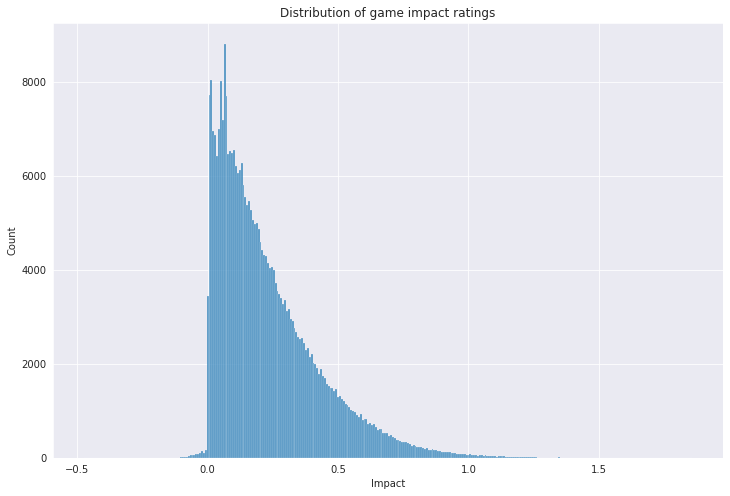

In [3]:
with sns.axes_style(style="darkgrid"):
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.histplot(
        x="IMPACT",
        data=ratings,
        ax=ax
    ).set(
        title="Distribution of game impact ratings",
        xlabel="Impact",
        ylabel="Count"
    )

In [4]:
tiers = ratings["IMPACT"].quantile(q=[0.975, 0.8, 0.6, 0.4, 0.2, 0.025]).to_frame()
tiers.rename(columns={"IMPACT": "Game impact"})

,Game impact
0.975,0.729719
0.800,0.373039
0.600,0.227745
0.400,0.133761
0.200,0.062914
0.025,0.007094


### Excluding exogenous variables

In [5]:
filelist = []
for season in SEASONS:
    if season.startswith("2021") or season.startswith("2005"):
        continue
    filelist += list(Path(os.environ["DATA_DIR"], season).glob("game-impact-plus/data_*.csv"))

ratings = pd.concat(
    (
        pd.read_csv(fpath, sep="|", index_col=0, dtype={"GAME_ID": str}) for fpath in filelist
    ),
    ignore_index=True
)
ratings = ratings[ratings["IMPACT"] != 0.0].copy()

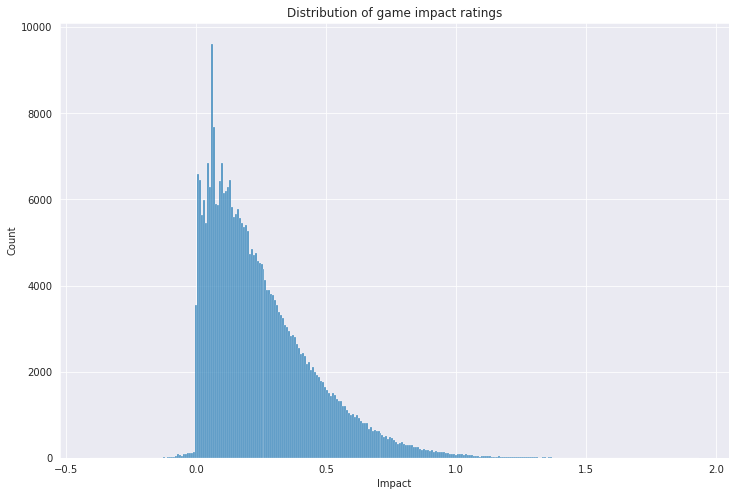

In [6]:
with sns.axes_style(style="darkgrid"):
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.histplot(
        x="IMPACT",
        data=ratings,
        ax=ax
    ).set(
        title="Distribution of game impact ratings",
        xlabel="Impact",
        ylabel="Count"
    )

In [7]:
tiers = ratings["IMPACT"].quantile(q=[0.975, 0.8, 0.6, 0.4, 0.2, 0.025]).to_frame()
tiers.rename(columns={"IMPACT": "Game ratings"})

,Game ratings
0.975,0.758746
0.800,0.403610
0.600,0.254601
0.400,0.155604
0.200,0.073957
0.025,0.009486


## Looking at season long performance

### Including exogenous variables

In [8]:
filelist = []
for season in SEASONS:
    if season.startswith("2021") or season.startswith("2005"):
        continue
    filelist.append(Path(os.environ["DATA_DIR"], season, "impact-summary.csv"))

ratings = pd.concat(
    (pd.read_csv(fpath, sep="|", index_col=0) for fpath in filelist), ignore_index=True
)

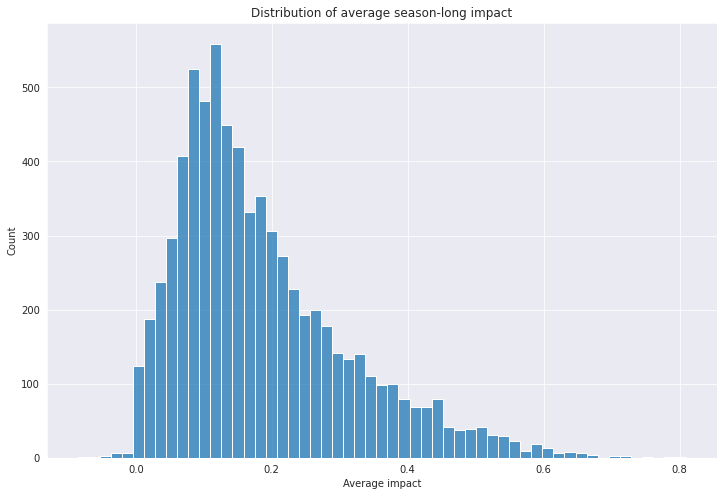

In [9]:
with sns.axes_style(style="darkgrid"):
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.histplot(
        x="IMPACT_mean",
        data=ratings,
        ax=ax
    ).set(
        title="Distribution of average season-long impact",
        xlabel="Average impact",
        ylabel="Count"
    )

In [10]:
tiers = ratings["IMPACT_mean"].quantile(q=[0.975, 0.8, 0.6, 0.4, 0.2, 0.025]).to_frame()
tiers.rename(columns={"IMPACT_mean": "Season-long average impact"})

,Season-long average impact
0.975,0.507773
0.800,0.281275
0.600,0.185309
0.400,0.126032
0.200,0.081936
0.025,0.015990


### Excluding exogenous variables

In [11]:
filelist = []
for season in SEASONS:
    if season.startswith("2021") or season.startswith("2005"):
        continue
    filelist.append(Path(os.environ["DATA_DIR"], season, "impact-plus-summary.csv"))

ratings = pd.concat(
    (pd.read_csv(fpath, sep="|", index_col=0) for fpath in filelist), ignore_index=True
)

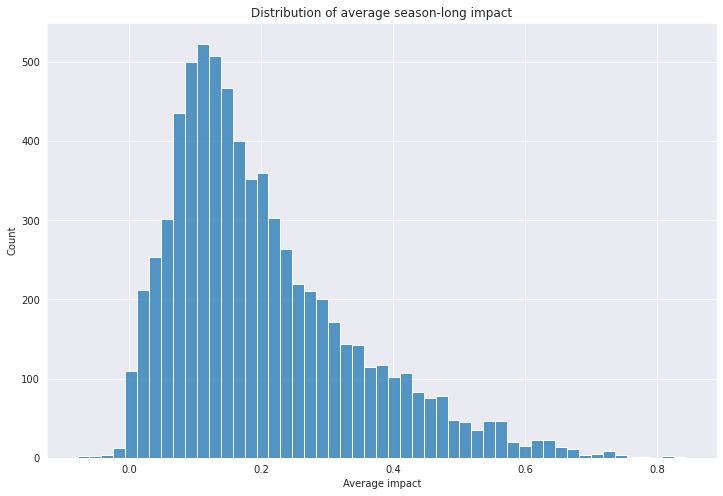

In [12]:
with sns.axes_style(style="darkgrid"):
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.histplot(
        x="IMPACT_mean",
        data=ratings,
        ax=ax
    ).set(
        title="Distribution of average season-long impact",
        xlabel="Average impact",
        ylabel="Count"
    )

In [13]:
tiers = ratings["IMPACT_mean"].quantile(q=[0.975, 0.8, 0.6, 0.4, 0.2, 0.025]).to_frame()
tiers.rename(columns={"IMPACT_mean": "Season-long average impact"})

,Season-long average impact
0.975,0.554305
0.800,0.308529
0.600,0.203010
0.400,0.138607
0.200,0.088596
0.025,0.017254
